In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob

In [56]:
# uitlity functions 

def average_payoff(t_fraction, theta):
    return theta * (1 - 2 * t_fraction) + 8 * (t_fraction + t_fraction * t_fraction)

def get_fname(**params):
    N = params['N']
    f_cultural = params['f_cultural']
    theta_list = params['theta_list']
    beta = params['beta']
    max_steps = params['max_steps']
    ensemble_size = params['ensemble_size']
    update_fraction = params['update_fraction']
    # convert theta_list to string
    theta_list = [str(theta) for theta in theta_list]
    theta_list = '_'.join(theta_list)
    # use fp to format the string

    fname = f"data_N_{N}_f_cultural_{f_cultural}_theta_list_{theta_list}_beta_{beta:.3f}_max_steps_{max_steps}_ensemble_size_{ensemble_size}_update_fraction_{update_fraction:.3f}.pkl"
    return fname

def load_data(N, f_cultural, theta_list, beta, max_steps, ensemble_size, update_fraction):
    fname = get_fname(N=N, f_cultural=f_cultural, theta_list=theta_list, beta=beta, max_steps=max_steps, ensemble_size=ensemble_size, update_fraction=update_fraction)
    try:    
        with open(f"../results/{fname}", 'rb') as f:
            data = pickle.load(f)
    except FileNotFoundError:
        print(f"File {fname} not found")
    return data


def expected_payoffs(data):
    expected_payoff = []
    for theta in data:
        average_payoff_ensemble = []
        for ensemble in data[theta]:
            strategies = np.array(data[theta][ensemble]['strategies'])
            mapped_matrix = np.where(strategies == 'T', 1, 0)
            fraction_t = np.mean(mapped_matrix, axis=0)
            average_payoff_ensemble.append(average_payoff(fraction_t, theta))

        average_payoff_ensemble = np.array(average_payoff_ensemble)
        expected_payoff.extend(np.mean(average_payoff_ensemble, axis=0))
    return np.array(expected_payoff)

# for each time step, calculate the expected fraction of T
def expected_t_fractions(data):
   expected_t_fraction = []
   for theta in data:
        ensembles_fractions = []
        for ensemble in data[theta]:
            strategies = np.array(data[theta][ensemble]['strategies'])
            mapped_matrix = np.where(strategies == 'T', 1, 0)
            fraction_t = np.mean(mapped_matrix, axis=0)
            ensembles_fractions.append(fraction_t)

        ensembles_fractions = np.array(ensembles_fractions)
        mean_ensembles_fractions = np.mean(ensembles_fractions, axis=0)
        expected_t_fraction.extend(mean_ensembles_fractions)

   return np.array(expected_t_fraction)


def final_expected_t_fraction(data):
    final_fractions = []
    for theta in data:
        final_ensembles_fractions = []
        for ensemble in data[theta]:
            final_strategies = np.array(data[theta][ensemble]['strategies'])[:, -1]
            mapped_final_strategies = np.where(final_strategies == 'T', 1, 0)
            fraction_t = np.mean(mapped_final_strategies)
            final_ensembles_fractions.append(fraction_t)
        ensembles_fractions = np.array(final_ensembles_fractions)
        mean_final_ensembles_fractions = np.mean(final_ensembles_fractions)
        final_fractions.append(mean_final_ensembles_fractions)
    return np.array(final_fractions)
    

In [64]:
N = 1000
f_cultural = 3 / 4
theta_list_1 = [1, 3, 15]
theta_list_2 = [1, 13, 15]
theta_list_3 = [15, 1, 13]
beta = 0.1
max_steps = 50
ensemble_size = 100
update_fraction = 0.1

data_1 =  load_data(N, f_cultural, theta_list_1, beta, max_steps, ensemble_size, update_fraction)
data_2 =  load_data(N, f_cultural, theta_list_2, beta, max_steps, ensemble_size, update_fraction)
data_3 =  load_data(N, f_cultural, theta_list_3, beta, max_steps, ensemble_size, update_fraction)

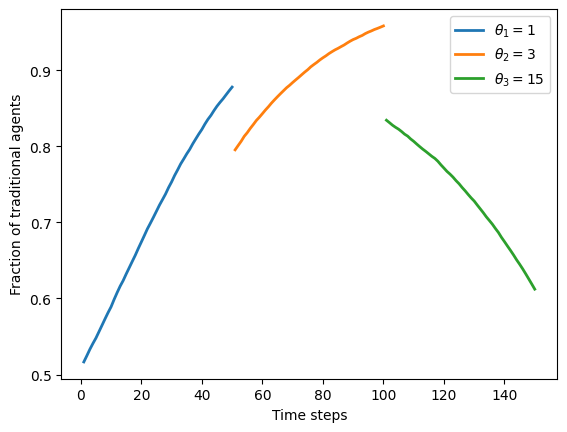

In [75]:
t_fractions = expected_t_fractions(data_1)
time_steps = np.arange(1, len(t_fractions) + 1)

for i in range(3):
    plt.plot(time_steps[i * 50 : (i + 1) * 50], t_fractions[i * 50 : (i + 1) * 50], label=f"$\\theta_{i + 1} = {theta_list_1[i]}$", lw=2)


plt.xlabel("Time steps")
plt.ylabel("Fraction of traditional agents")
plt.legend()
plt.savefig(f"t_fractions_{"_".join(map(str, theta_list_1))}.png", dpi=300, bbox_inches='tight')
plt.show()

    

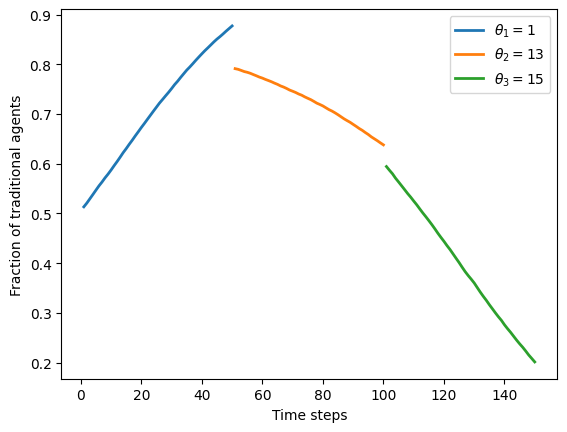

In [76]:
t_fractions = expected_t_fractions(data_2)
time_steps = np.arange(1, len(t_fractions) + 1)

for i in range(3):
    plt.plot(time_steps[i * 50 : (i + 1) * 50], t_fractions[i * 50 : (i + 1) * 50], label=f"$\\theta_{i + 1} = {theta_list_2[i]}$", lw=2)

plt.xlabel("Time steps")
plt.ylabel("Fraction of traditional agents")
plt.legend()
plt.savefig(f"t_fractions_{"_".join(map(str, theta_list_2))}.png", dpi=300, bbox_inches='tight')
plt.show()

    

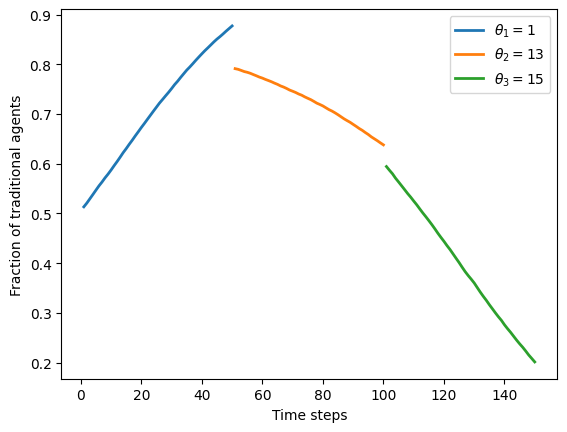

In [ ]:
t_fractions = expected_t_fractions(data_3)
time_steps = np.arange(1, len(t_fractions) + 1)

for i in range(3):
    plt.plot(time_steps[i * 50 : (i + 1) * 50], t_fractions[i * 50 : (i + 1) * 50], label=f"$\\theta_{i + 1} = {theta_list_3[i]}$", lw=2)

plt.xlabel("Time steps")
plt.ylabel("Fraction of traditional agents")
plt.legend()
plt.savefig(f"t_fractions_{"_".join(map(str, theta_list_3))}.png", dpi=300, bbox_inches='tight')
plt.show()

    